# Premier league analysis from 2010/11 - 2019/20 seasons

## Table of Contents
* [Introduction](#Introduction)
* [Imports and Configs](#ImportsandConfigs)
* [EDA](#EDA)
* [Deploying predictive models](#Deployingpredictivemodels)
* [''2up'' Section](#2upsection)

## Introduction <a class="anchor" id="Introduction"></a>

This project probes the premier league football dataset provided by [Tara Gnguyen](https://github.com/tara-nguyen). There are many questions to ask here. For example, without using goals scored can we predict if a home team won using other features in the dataset (such as AwayShots)? If a team is losing at half time, can we predict if they come back to either draw or lose at full time using only data from the first half? Let's find out! A note: for the former question we shouldn't expect to create models with very high accuracy, if we could the betting companies would be runied! However, we can still gain some interesting insight. 

## Imports and Configs <a class="anchor" id="ImportsandConfigs"></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV, LinearRegression
from sklearn.model_selection import train_test_split
from pandas.api.types import is_numeric_dtype

#pd.set_option('display.max_columns', None)
#pd.set_option('display.min_rows', 100)

url = "https://raw.githubusercontent.com/tara-nguyen/english-premier-league-datasets-for-10-seasons/main/epldat10seasons/epl-allseasons-matchstats.csv"
df = pd.read_csv(url)



## EDA <a class="anchor" id="EDA"></a>

Let's get a feel for our data.

In [2]:
print(df.columns)
df.head()

Index(['Season', 'Date', 'Referee', 'HomeTeam', 'AwayTeam', 'FullTime',
       'Halftime', 'HomeGoals', 'HomeGoalsHalftime', 'HomeShots',
       'HomeShotsOnTarget', 'HomeCorners', 'HomeFouls', 'HomeYellowCards',
       'HomeRedCards', 'AwayGoals', 'AwayGoalsHalftime', 'AwayShots',
       'AwayShotsOnTarget', 'AwayCorners', 'AwayFouls', 'AwayYellowCards',
       'AwayRedCards'],
      dtype='object')


,Season,Date,Referee,HomeTeam,AwayTeam,FullTime,Halftime,HomeGoals,HomeGoalsHalftime,HomeShots,...,HomeYellowCards,HomeRedCards,AwayGoals,AwayGoalsHalftime,AwayShots,AwayShotsOnTarget,AwayCorners,AwayFouls,AwayYellowCards,AwayRedCards
0,2010/11,2010-08-14,M Dean,Aston Villa,West Ham,HomeWin,HomeWin,3,2,23,...,1,0,0,0,12,2,7,15,2,0
1,2010/11,2010-08-14,P Dowd,Blackburn,Everton,HomeWin,HomeWin,1,1,7,...,2,0,0,0,17,12,3,14,1,0
2,2010/11,2010-08-14,S Attwell,Bolton,Fulham,Draw,Draw,0,0,13,...,1,0,0,0,12,7,8,13,3,0
3,2010/11,2010-08-14,M Clattenburg,Chelsea,West Brom,HomeWin,HomeWin,6,2,18,...,1,0,0,0,10,4,1,10,0,0
4,2010/11,2010-08-14,A Taylor,Sunderland,Birmingham,Draw,HomeWin,2,1,6,...,3,1,2,0,13,7,6,10,3,0


In [3]:
#Let's drop the columns we won't use
df.drop(columns = ['Referee', 'HomeTeam', 'AwayTeam'], inplace=True)

In [4]:
df.isna().sum()

Season               0
Date                 0
FullTime             0
Halftime             0
HomeGoals            0
HomeGoalsHalftime    0
HomeShots            0
HomeShotsOnTarget    0
HomeCorners          0
HomeFouls            0
HomeYellowCards      0
HomeRedCards         0
AwayGoals            0
AwayGoalsHalftime    0
AwayShots            0
AwayShotsOnTarget    0
AwayCorners          0
AwayFouls            0
AwayYellowCards      0
AwayRedCards         0
dtype: int64

No missing data, woo! We can also deduce this by using info().

Let's create a column with 1 to indicate a home team win and 0 otherwise. This is so we can calculate correlation coefficents and create predictive models later on.

In [5]:
df = pd.get_dummies(df, columns = ['FullTime'])
df.head()

,Season,Date,Halftime,HomeGoals,HomeGoalsHalftime,HomeShots,HomeShotsOnTarget,HomeCorners,HomeFouls,HomeYellowCards,...,AwayGoalsHalftime,AwayShots,AwayShotsOnTarget,AwayCorners,AwayFouls,AwayYellowCards,AwayRedCards,FullTime_AwayWin,FullTime_Draw,FullTime_HomeWin
0,2010/11,2010-08-14,HomeWin,3,2,23,11,16,15,1,...,0,12,2,7,15,2,0,0,0,1
1,2010/11,2010-08-14,HomeWin,1,1,7,2,1,19,2,...,0,17,12,3,14,1,0,0,0,1
2,2010/11,2010-08-14,Draw,0,0,13,9,4,12,1,...,0,12,7,8,13,3,0,0,1,0
3,2010/11,2010-08-14,HomeWin,6,2,18,13,3,10,1,...,0,10,4,1,10,0,0,0,0,1
4,2010/11,2010-08-14,HomeWin,2,1,6,2,3,13,3,...,0,13,7,6,10,3,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Season             3800 non-null   object
 1   Date               3800 non-null   object
 2   Halftime           3800 non-null   object
 3   HomeGoals          3800 non-null   int64 
 4   HomeGoalsHalftime  3800 non-null   int64 
 5   HomeShots          3800 non-null   int64 
 6   HomeShotsOnTarget  3800 non-null   int64 
 7   HomeCorners        3800 non-null   int64 
 8   HomeFouls          3800 non-null   int64 
 9   HomeYellowCards    3800 non-null   int64 
 10  HomeRedCards       3800 non-null   int64 
 11  AwayGoals          3800 non-null   int64 
 12  AwayGoalsHalftime  3800 non-null   int64 
 13  AwayShots          3800 non-null   int64 
 14  AwayShotsOnTarget  3800 non-null   int64 
 15  AwayCorners        3800 non-null   int64 
 16  AwayFouls          3800 non-null   int64 


In [7]:
#creating a dataframe of only the numeric values
df_num = df.drop(columns = ['Season', 'Date',
       'Halftime'])

In [8]:
df.duplicated().sum()

0

No duplictes! 

In [9]:
df.describe()

,HomeGoals,HomeGoalsHalftime,HomeShots,HomeShotsOnTarget,HomeCorners,HomeFouls,HomeYellowCards,HomeRedCards,AwayGoals,AwayGoalsHalftime,AwayShots,AwayShotsOnTarget,AwayCorners,AwayFouls,AwayYellowCards,AwayRedCards,FullTime_AwayWin,FullTime_Draw,FullTime_HomeWin
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,1.552368,0.687105,14.141316,5.697632,5.984474,10.503158,1.498684,0.059211,1.193158,0.530263,11.297632,4.570789,4.770000,10.976579,1.760789,0.081316,0.296579,0.246316,0.457105
std,1.299116,0.844749,5.522862,3.317283,3.142994,3.380960,1.205846,0.243730,1.167948,0.741455,4.760613,2.806423,2.744684,3.530819,1.273741,0.283750,0.456809,0.430921,0.498222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,10.000000,3.000000,4.000000,8.000000,1.000000,0.000000,0.000000,0.000000,8.000000,3.000000,3.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,14.000000,5.000000,6.000000,10.000000,1.000000,0.000000,1.000000,0.000000,11.000000,4.000000,4.000000,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,17.000000,8.000000,8.000000,13.000000,2.000000,0.000000,2.000000,1.000000,14.000000,6.000000,6.000000,13.000000,3.000000,0.000000,1.000000,0.000000,1.000000
max,8.000000,5.000000,43.000000,24.000000,19.000000,24.000000,7.000000,2.000000,9.000000,5.000000,30.000000,20.000000,19.000000,26.000000,9.000000,2.000000,1.000000,1.000000,1.000000


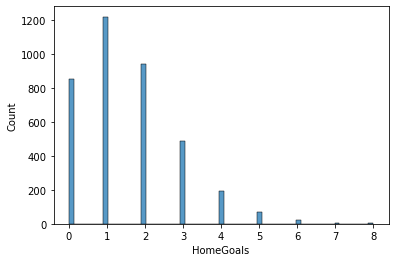

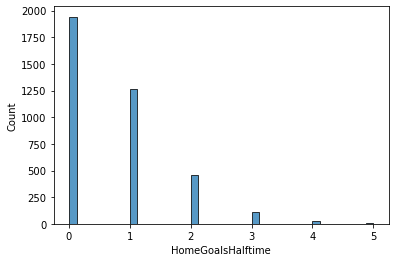

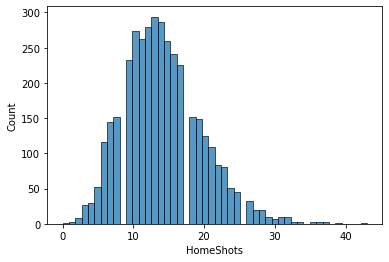

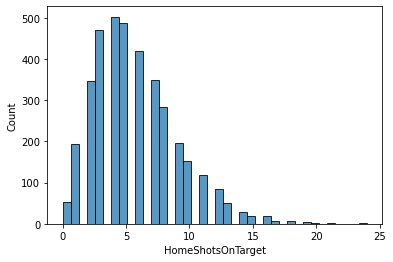

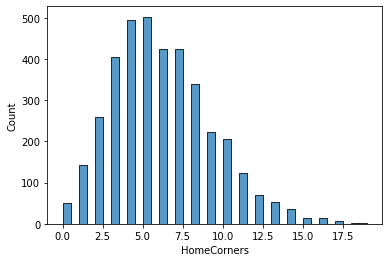

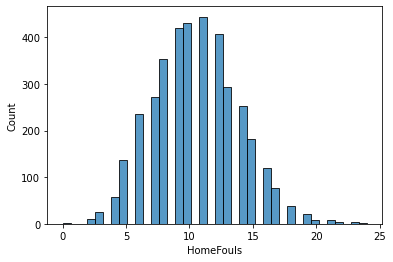

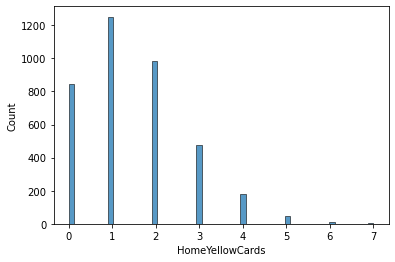

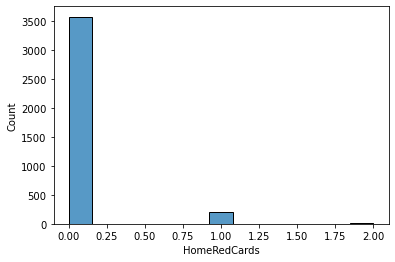

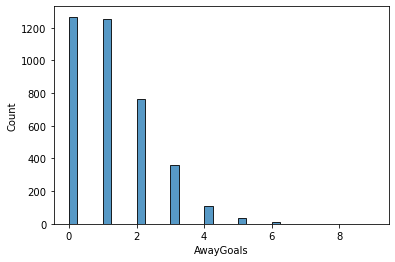

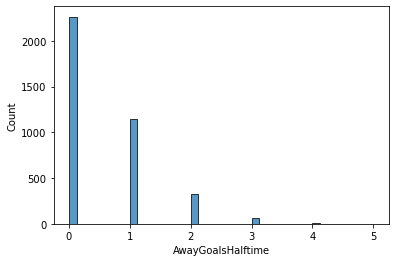

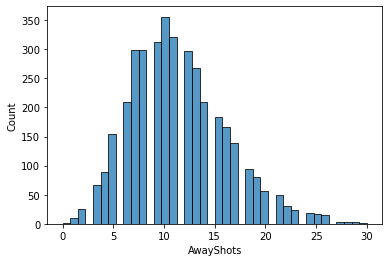

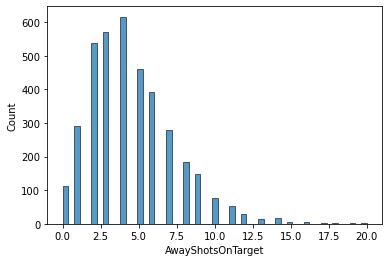

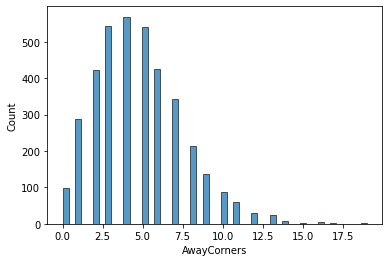

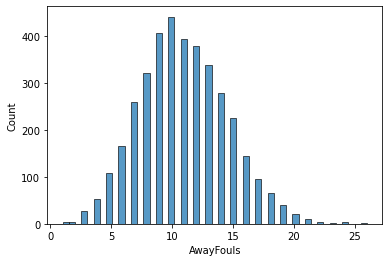

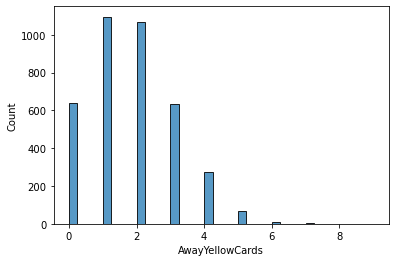

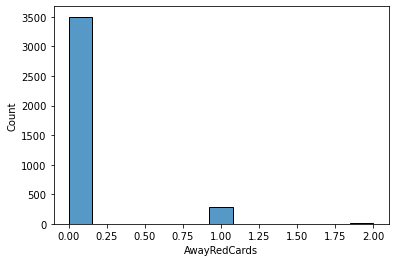

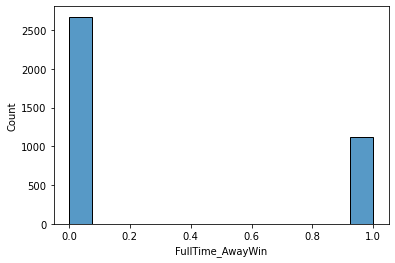

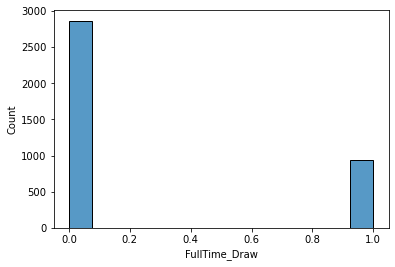

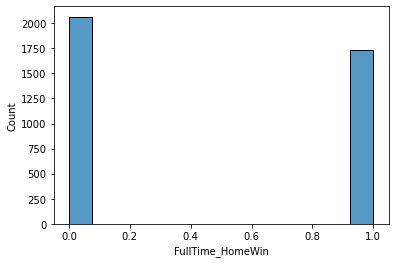

<Figure size 432x288 with 0 Axes>

In [20]:
for col in list(df_num.columns):
    sns.histplot(df_num[col])
    plt.show()
    plt.clf()

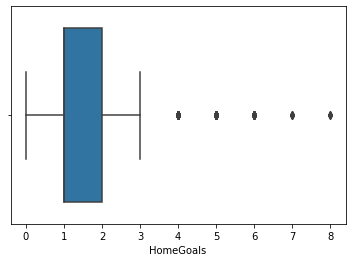

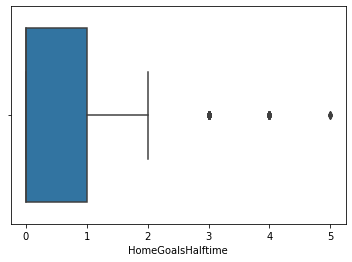

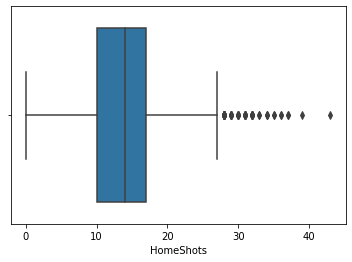

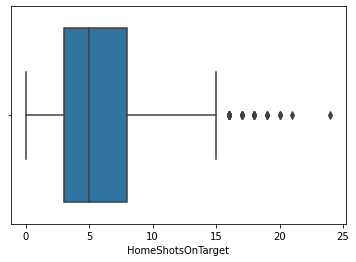

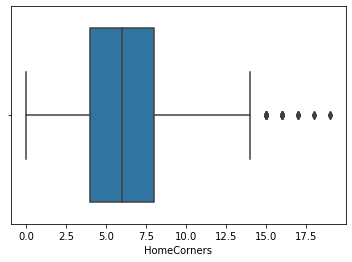

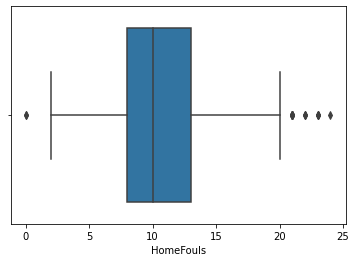

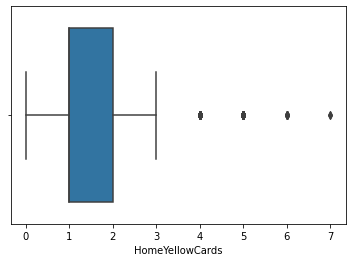

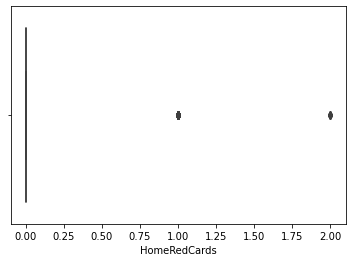

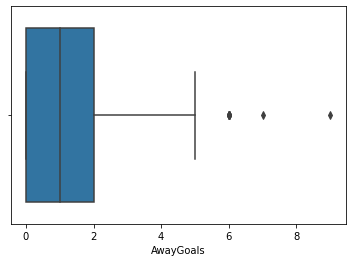

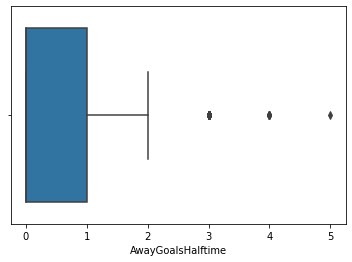

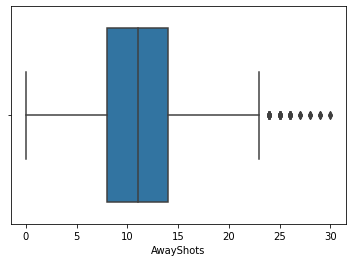

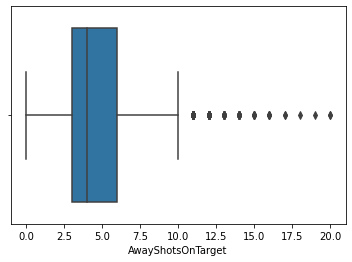

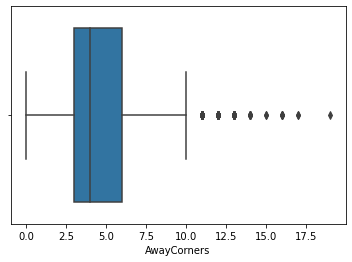

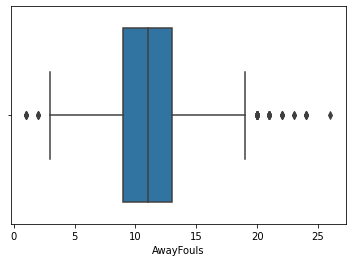

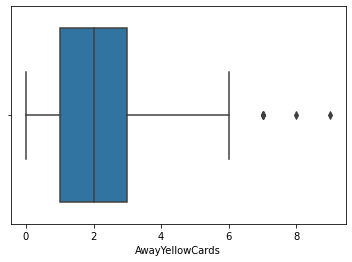

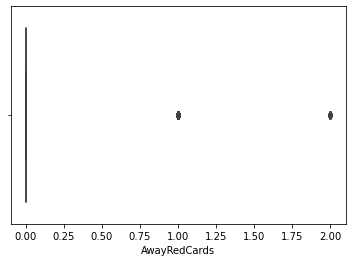

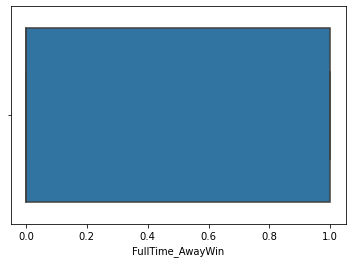

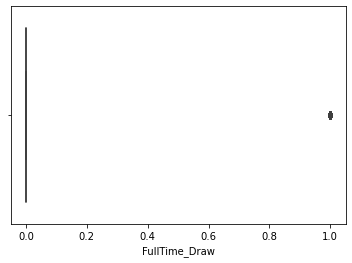

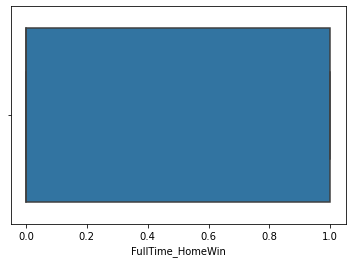

<Figure size 432x288 with 0 Axes>

In [11]:
for col in list(df_num.columns):
    sns.boxplot(x=df_num[col])
    plt.show()
    plt.clf()

It looks like most of these features are right-skewed, however HomeFouls looks more like a normal distribution.

We shall find out the correlation between features, and, in particular, which feature correlates with a home win at full time the strongest.

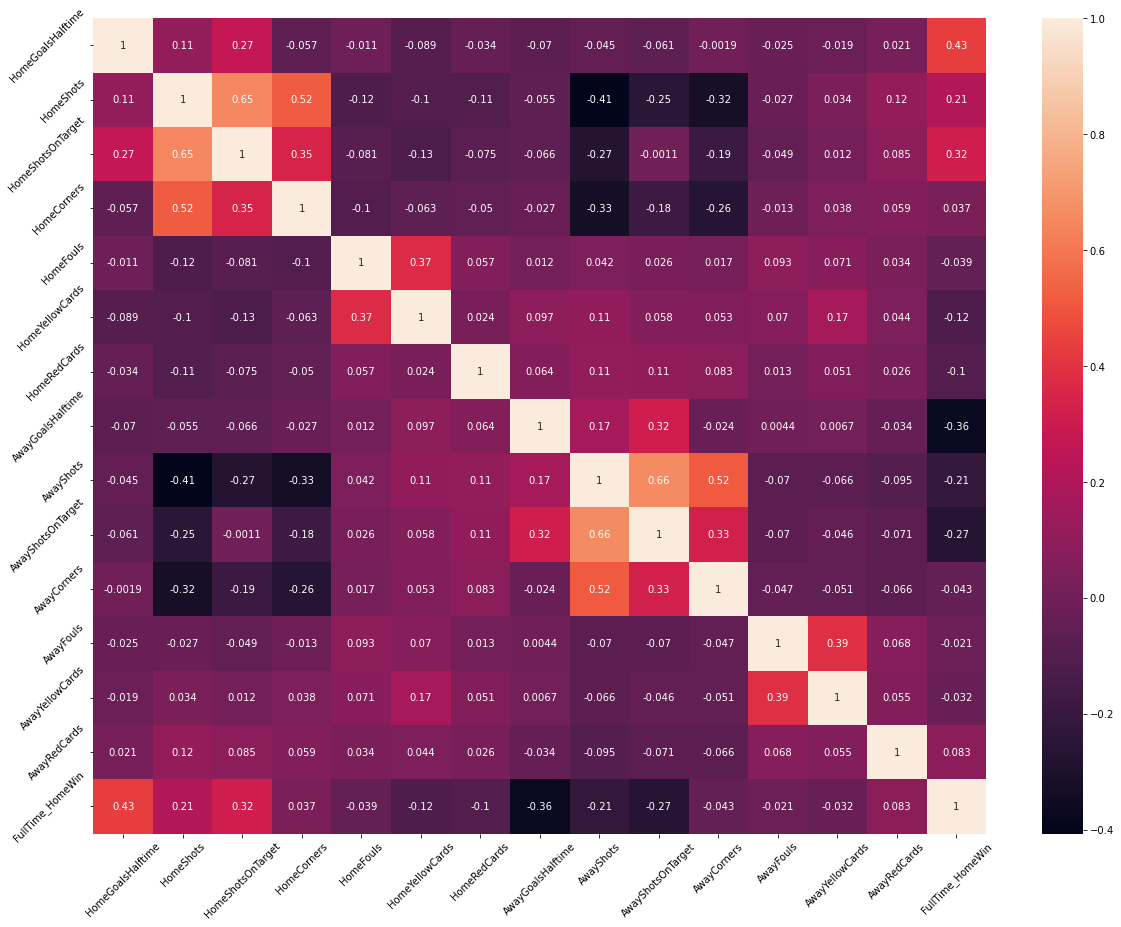

In [12]:
df_homewin = df_num.drop(columns = ['HomeGoals', 'AwayGoals', 'FullTime_Draw', 'FullTime_AwayWin'])
fig, ax = plt.subplots(figsize=(20,15)) 
ax = sns.heatmap(df_homewin.corr(method='pearson'), annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

Home Goals at Halftime correlate the strongest with a home win at full time (shock). There is also a negative correlation of -0.41 between between HomeShots and AwayShots. Let's visualise this with a scatter plot.


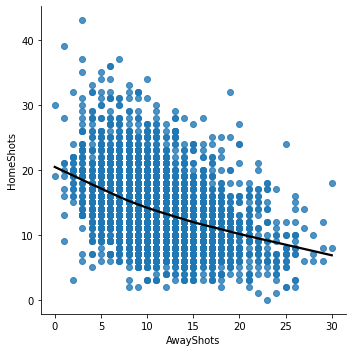

<Figure size 432x288 with 0 Axes>

In [18]:
sns.lmplot(x='AwayShots', y='HomeShots', data=df_homewin, line_kws={'color':'black'}, lowess=True)
plt.show()
plt.clf()

## Deploying predictive models <a class="anchor" id="Deployingpredictivemodels"></a>

### Standardising our data

In [28]:
features = df_homewin.drop(columns=['FullTime_HomeWin'])
y = df_homewin['FullTime_HomeWin']

In [29]:
scaler = StandardScaler()
scaler.fit(features)
X = scaler.transform(features)

### Splitting our data into training and test sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

We do not need a validation set as we will be creating a LogisticRegressionCV model, which implements cross validation. 

### Creating our Logistic Regression model

We will be creating LogisticRegressionCV 

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
C_array = np.logspace(-2,2,100)
clf_l1 = LogisticRegressionCV(Cs=C_array, cv=5,penalty='l1', solver='liblinear', scoring='f1')
clf_l1.fit(X, y)

## ''2up'' section <a class="anchor" id="2upsection"></a>

Next we find the percentage of games where a team has been two goals up by half time but did not go on to win. Columns we need are 'HomeGoalsHalftime', 'AwayGoalsHalftime', 'Halftime', 'Fulltime'. We will isolate the observations where 'HomeGoalsHalftime' and 'AwayGoalsHalftime' differ by 2 or more goals but 'Halftime' is not equal to 'Fulltime'. We will store these observations in a dataframe called 'two_up_not_win_df'. 

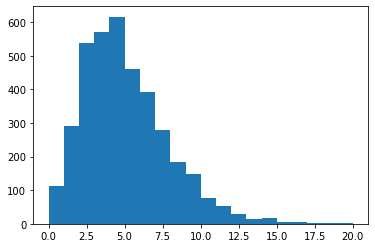

In [13]:
#df.dtypes
#df.isna().sum()
plt.hist(df.AwayShotsOnTarget, bins=20)
plt.show()

In [14]:
two_up_at_halftime_df = df[(df.HomeGoalsHalftime >= df.AwayGoalsHalftime + 2) | 
                           (df.HomeGoalsHalftime + 2 <= df.AwayGoalsHalftime)]

two_up_at_halftime_df[['HomeGoalsHalftime', 'AwayGoalsHalftime']].head()

,HomeGoalsHalftime,AwayGoalsHalftime
0,2,0
3,2,0
6,0,3
7,2,0
9,2,0


In [15]:
two_up_not_win_df = two_up_at_halftime_df[two_up_at_halftime_df.Halftime != two_up_at_halftime_df.FullTime]

two_up_not_win_df[['FullTime', 'Halftime', 'HomeGoalsHalftime', 'AwayGoalsHalftime', 'HomeGoals', 'AwayGoals']].head(10)

AttributeError: 'DataFrame' object has no attribute 'FullTime'

In [ ]:
percentage_1 = round(len(two_up_not_win_df.index) / len(df.index), 4)
percentage_2 = round(len(two_up_at_halftime_df.index) / len(df.index), 4)
percentage_3 = round(len(two_up_not_win_df.index) / len(two_up_at_halftime_df.index), 4)

print(f"The percentage of games where a team has been two goals up at half time is {percentage_2}%.")
print(f"The percentage of games where a team has not won given that they had been two goals up at half time is {percentage_3}%.")
print(f"The percentage of games where a team had been two goals up at half time but did not win is {percentage_1}%.")

The last percentage is smaller than the true percentage of games played where a team has been goals up at any time but did not go on to win the game.

### Finding these percentages for each season

In [ ]:
season_list = df.Season.unique()
print(season_list)

In [ ]:
two_up_not_win_percentage_list_for_each_season = []
for season in season_list:
    percentage = round(len(two_up_not_win_df[two_up_not_win_df.Season == season].index) / len(df[df.Season == season].index), 4)
    two_up_not_win_percentage_list_for_each_season.append(percentage)

two_up_not_win_percentage_list_for_each_season

In [ ]:
plt.plot(two_up_not_win_percentage_list_for_each_season)
plt.title('Plot showing percentage of games where a team was 2 goals up at half time but did not win, for ea')
plt.xlabel('2010/11 to 2019/20 seasons')
plt.show()

### Deploying linear regression model

In [ ]:
seasons_list_last_digit_of_start_year = np.array(range(10, 20, 1)).reshape(-1, 1)
line_fitter = LinearRegression()
line_fitter.fit(seasons_list_last_digit_of_start_year, two_up_not_win_percentage_list_for_each_season)
percentage_predict = line_fitter.predict(seasons_list_last_digit_of_start_year)

plt.plot(seasons_list_last_digit_of_start_year, two_up_not_win_percentage_list_for_each_season, 'o')
plt.plot(seasons_list_last_digit_of_start_year, percentage_predict)
plt.show()